# Importing Libraires

In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

# Divided Dataset into training and testing data

In [3]:
(x_train,y_train),(x_test,y_test) = keras.datasets.mnist.load_data()
x_train = x_train/255
x_test = x_test/255

# Creating a Deep Learning Model

In [4]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,input_shape=(100,),activation="sigmoid")
])

model.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(x_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 8s 3ms/step - loss: 0.4584 - accuracy: 0.8696
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1322 - accuracy: 0.9615
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0877 - accuracy: 0.9752
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0645 - accuracy: 0.9813
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0500 - accuracy: 0.9848


In [5]:
model.evaluate(x_test,y_test) #evaluating the model

313/313 [==============================] - 1s 3ms/step - loss: 0.0827 - accuracy: 0.9747


[0.08273552358150482, 0.9746999740600586]

In [6]:
y_predicted = model.predict(x_test) #storing the preditcion of the model

In [10]:
y_prediced_int = [np.argmax(i) for i in y_predicted] #converting the y_predicted data into the int values
model.save('model.h5')

# Representation of Confusion Matrix

Text(69.0, 0.5, 'Truth')

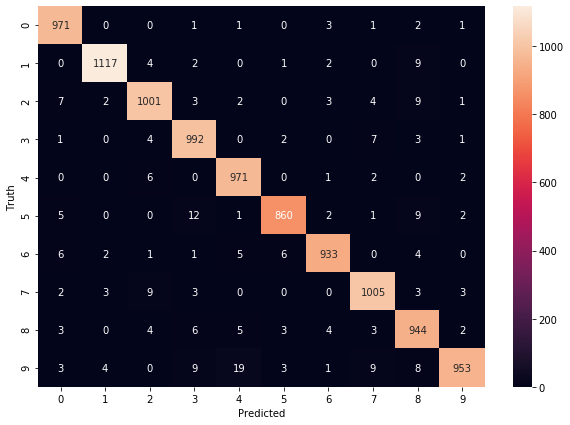

In [8]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_prediced_int)
plt.figure(figsize = (10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')